  ticker business_date  Open  High  Close  adj_close     Volume
0   NVDA    2016-10-20  1.68  1.70   1.69       1.67  312084000
1   NVDA    2016-10-21  1.69  1.69   1.69       1.66  279508000
2   NVDA    2016-10-24  1.70  1.77   1.77       1.74  339836000
3   NVDA    2016-10-25  1.76  1.81   1.80       1.77  397460000
4   NVDA    2016-10-26  1.78  1.82   1.80       1.78  333792000
        ticker business_date    Open    High   Close  adj_close    Volume
12072  BTC-USD    2016-10-20  630.66  631.92  630.86     630.86  56957300
12073  BTC-USD    2016-10-21  630.83  634.09  632.83     632.83  55951000
12074  BTC-USD    2016-10-22  633.14  658.20  657.29     657.29  78556496
12075  BTC-USD    2016-10-23  657.62  661.13  657.07     657.07  54474600
12076  BTC-USD    2016-10-24  657.16  657.25  653.76     653.76  62218200
Tickers in the dataset: ['BTC-USD' 'NVDA' 'ORCL' 'QQQ' 'SOXL' 'SPY' 'TQQQ']
Processed data for 7 tickers.
X_train shape: (14574, 60, 5), y_train shape: (14574,)


2024-10-20 18:40:39.484262: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 18:40:39.498861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 18:40:39.515022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 18:40:39.519450: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 18:40:39.531802: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10


2024-10-20 18:40:46.641642: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


456/456 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0072
Epoch 2/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0017
Epoch 3/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0014
Epoch 4/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0013
Epoch 5/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0011
Epoch 6/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 9.6344e-04
Epoch 7/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 8.7708e-04
Epoch 8/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 8.6645e-04
Epoch 9/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 8.4930e-04
Epoch 10/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 7.8541e-04
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Mean Squared Error for NVDA: 2.476166107067618


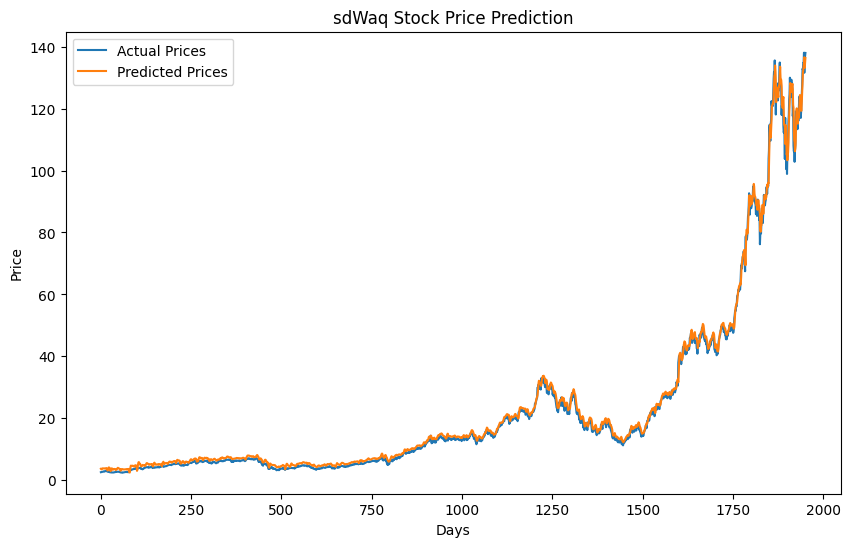

In [3]:
import pandas as pd

# Access the file directly using its URI (if it is public or includes a SAS token)
uri = "azureml://subscriptions/0ddac079-a3e0-494f-9918-5e577eefed83/resourcegroups/testdgroup/workspaces/TestDMLNotebook1/datastores/workspaceblobstore/paths/UI/2024-10-20_162656_UTC/eod_data_full_2_decimal.csv"

# Load the CSV into a DataFrame
data = pd.read_csv(uri, parse_dates=['business_date'])

# Display the first few rows
print(data.head())

!pip install pandas numpy matplotlib scikit-learn tensorflow

import pandas as pd

# Assuming the dataset is already loaded in the 'data' DataFrame
# Ensure the 'Close' column is used for prediction
data = data.sort_values(by=['ticker', 'business_date'])

# View the first few rows
print(data.head())

# Group data by ticker
tickers = data['ticker'].unique()
print(f"Tickers in the dataset: {tickers}")

# Prepare features and target columns
feature_columns = ['Open', 'High', 'Close', 'adj_close', 'Volume']
target_column = 'Close'

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Store models and scalers for each ticker
scalers = {}

def preprocess_ticker_data(df):
    # Initialize a scaler for each ticker
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Fit scaler on the feature columns
    scaled_data = scaler.fit_transform(df[feature_columns])
    scalers[df['ticker'].iloc[0]] = scaler  # Save the scaler for inverse scaling
    
    return scaled_data

# Preprocess data for all tickers
ticker_data = {}
for ticker in tickers:
    df = data[data['ticker'] == ticker]
    ticker_data[ticker] = preprocess_ticker_data(df)

print(f"Processed data for {len(ticker_data)} tickers.")

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])  # Use all features for input
        y.append(data[i, 2])  # Predict 'Close' (target value)
    return np.array(X), np.array(y)

# Create sequences for each ticker
X_train, y_train = [], []
for ticker, scaled_data in ticker_data.items():
    X, y = create_sequences(scaled_data)
    X_train.append(X)
    y_train.append(y)

# Combine all tickers into a single training set
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

import tensorflow as tf
tf.get_logger().setLevel('ERROR')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predict 'Close' price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

def predict_for_ticker(ticker, data, model):
    # Use the corresponding scaler for the ticker
    scaler = scalers[ticker]
    
    # Preprocess the data for prediction
    scaled_data = scaler.transform(data[feature_columns])
    X, _ = create_sequences(scaled_data)  # Generate input sequences
    
    # Make predictions
    predictions = model.predict(X)
    
    # Inverse scale the predictions to original values
    predictions = scaler.inverse_transform(np.hstack([predictions, np.zeros((predictions.shape[0], len(feature_columns) - 1))]))[:, 0]
    
    return predictions

# Example: Predict for a specific ticker (e.g., 'AAPL')
predictions = predict_for_ticker('NVDA', data[data['ticker'] == 'NVDA'], model)

from sklearn.metrics import mean_squared_error

# Example: Compare predictions with actual values for AAPL
actual = data[data['ticker'] == 'NVDA']['Close'].values[-len(predictions):]
mse = mean_squared_error(actual, predictions)
print(f"Mean Squared Error for NVDA: {mse}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('sdWaq Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
